# <center>DATA AND SAMPLING DISTRIBUTION</center>

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')

In [8]:
sp500_px = pd.read_csv('/content/sample_data/sp500_px.txt')

In [9]:
loans_income.shape

(50000, 1)

In [10]:
sp500_px.shape

(1330, 518)

In [11]:
loans_sample = loans_income.sample(n=1000)

In [12]:
loans_sample.shape

(1000, 1)

In [13]:
loans_sample.head()

,x
33595,70000
21994,30000
44049,50000
23177,54000
24225,44000


In [14]:
#mean of 5 numbers
sample_mean_5 = loans_sample.rolling(5).mean().x

In [15]:
sample_mean_5

33595        NaN
21994        NaN
44049        NaN
23177        NaN
24225    49600.0
          ...   
34150    59896.0
49211    62696.0
9795     76970.6
10991    85007.2
43201    88007.2
Name: x, Length: 1000, dtype: float64

In [16]:
sample_mean_5 = sample_mean_5.dropna()

In [17]:
sample_mean_5

24225    49600.0
8104     42200.0
21792    49890.0
38846    54890.0
47788    55050.0
          ...   
34150    59896.0
49211    62696.0
9795     76970.6
10991    85007.2
43201    88007.2
Name: x, Length: 996, dtype: float64

In [18]:
#mean of 20 numbers
sample_mean_20 = loans_income.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()



In [19]:
sample_mean_20

19       71966.6
20       70116.6
21       71516.6
22       68516.6
23       68578.5
          ...   
49995    85425.0
49996    84475.0
49997    82975.0
49998    84575.0
49999    84675.0
Name: x, Length: 49981, dtype: float64

In [20]:
# mean of 30 numbers
sample_mean_30 = loans_income.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

In [21]:
sample_mean_30

29       67244.333333
30       69211.000000
31       69599.000000
32       67599.000000
33       70073.600000
             ...     
49995    79880.066667
49996    79720.066667
49997    79386.733333
49998    81520.066667
49999    81620.066667
Name: x, Length: 49971, dtype: float64

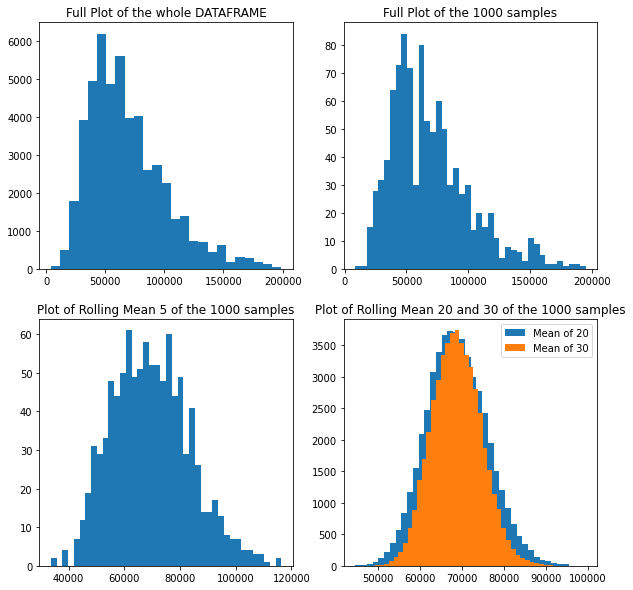

In [22]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(loans_sample.x,bins=40)
plt.title('Full Plot of the 1000 samples')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')

ax.legend()
plt.show()

### Population stats

In [23]:
#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


### Bootstrapping for 1000,10000,20000 Samples

In [24]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)

In [25]:
bootstrap_1000[:10]

array([185000,  25915, 110000,  35000,  76000,  94500,  68500,  70000,
        58444, 120000])

In [26]:
bootstrap_10000

array([ 32000,  40000, 119000, ...,  30000,  86500, 157922])

In [27]:
bootstrap_20000[:10]

array([ 45000,  76000,  18000, 140000,  65000, 110000,  70000,  37000,
        80000,  72000])

In [28]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

In [29]:
arr_bootstraps

[array([185000,  25915, 110000,  35000,  76000,  94500,  68500,  70000,
         58444, 120000,  40000,  52000, 120000,  42000,  48399,  35000,
         47500,  50000,  70000,  72000,  61000,  58000,  44000,  85000,
         42000,  40724,  38000,  50000,  85000,  37000,  18000, 120000,
         75000,  77000, 126600,  58500, 105596,  90000,  36000,  38000,
         60000,  48000,  95000,  61000,  62300,  72000,  70000,  86000,
        126000, 100000,  90000,  80000, 100000,  70000,  51261,  61000,
        100000,  60000,  53000,  90000, 106667,  30000, 133000,  55000,
         72000,  55000,  45000,  51000,  50000,  56000,  25000, 100495,
         26000,  46000,  66900,  73524,  32625, 140000,  75000,  35000,
         40000,  70000,  42000,  68590,  16656,  21000,  75000,  55000,
        120000,  49400,  60000,  80000, 150000,  44000,  48000,  31200,
        118000, 120000, 120000,  60000,  26000, 126000,  55000,  85000,
         72000,  78600,  35000,  51500,  74500,  77000,  55000, 

In [30]:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  34413.69045690937
Bootstrap Mean :  69972.833
Bootstrap Median:  63000.0
Boostrap Bias,  -1212.314559999999
Standard Error: 1088.2564453583425

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32357.647243831736
Bootstrap Mean :  67781.292
Bootstrap Median:  60000.0
Boostrap Bias,  979.2264399999985
Standard Error: 323.57647243831735

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32663.645721182304
Bootstrap Mean :  68681.6148
Bootstrap Median:  62000.0
Boostrap Bias,  78.90364000000409
Standard Error: 230.96685387722962

------

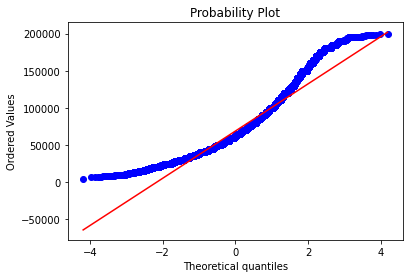

In [31]:
stats.probplot(loans_income.x, dist="norm", plot=pylab)
pylab.show()

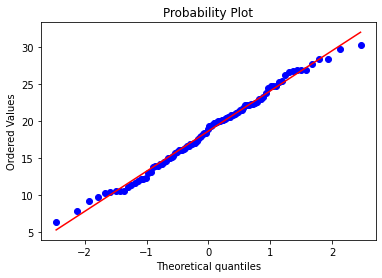

In [32]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

#### Second Datasets.

In [33]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,ADI,AVGO,BRCM,FSLR,INTC,LLTC,MCHP,MU,NVDA,QRVO,QCOM,SWKS,TXN,XLNX,AAPL,HPQ,EA,SNDK,STX,WDC,TEL,HRS,MSI,ACN,AMAT,KLAC,LRCX,ADBE,ADSK,...,ENDP,LLY,MNK,MRK,MYL,PRGO,PFE,ZTS,ABT,A,BCR,BAX,BDX,BSX,EW,HSP,ISRG,JNJ,MDT,PKI,STJ,SYK,TMO,VAR,ZBH,BMY,CAH,CERN,ESRX,MCK,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,-0.015785,0.0,0.0,0.0,-0.050488,-0.089870,0.0,0.037021,0.0,0.0,-0.044718,-0.041262,0.060179,0.033152,-0.024235,0.045586,0.12500,0.0,0.0,0.118103,0.0,0.016412,-1.842719,0.0,-0.012867,0.079940,0.246706,-0.044884,0.057267,...,0.0,-0.077535,0.0,-0.028797,0.166355,-0.577943,0.066591,0.0,0.045961,0.0,-0.326659,0.000000,-0.033363,0.06250,0.0,0.0,0.0,0.018827,0.006047,0.000000,0.187132,0.276317,-0.124187,0.037430,0.0,0.038546,0.060142,0.03126,0.00195,0.0,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,-0.015793,0.0,0.0,0.0,0.095367,0.044935,0.0,0.037020,0.0,0.0,0.006387,-0.041252,0.102317,0.099446,0.064618,0.072942,0.09375,0.0,0.0,0.000000,0.0,-0.032829,0.594428,0.0,0.016077,0.019985,0.411170,0.134672,0.057267,...,0.0,-0.031014,0.0,-0.172781,-0.066536,0.346766,-0.027745,0.0,-0.045960,0.0,-0.093331,0.018157,0.100076,0.03125,0.0,0.0,0.0,-0.056481,-0.048392,0.041782,-0.074851,-0.027632,0.000000,-0.074859,0.0,-0.038546,0.060142,0.10156,0.01953,0.0,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,0.047363,0.0,0.0,0.0,0.000000,0.067402,0.0,0.123402,0.0,0.0,0.035141,0.041252,-0.024066,0.016572,-0.016148,-0.045586,-0.06250,0.0,0.0,0.118103,0.0,-0.032829,0.237767,0.0,0.051450,0.000000,0.054828,0.082299,-0.042955,...,0.0,-0.062028,0.0,-0.143984,-0.066536,0.693532,-0.133183,0.0,-0.153198,0.0,-0.093331,-0.072626,0.000000,0.03125,0.0,0.0,0.0,-0.018827,0.000000,0.208912,0.018711,-0.027632,0.000000,0.044923,0.0,-0.115639,-0.030071,-0.01562,0.00000,0.0,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,0.205236,0.0,0.0,0.0,-0.050495,0.022467,0.0,-0.012340,0.0,0.0,0.006387,0.041252,-0.024073,0.049723,-0.032305,-0.091184,0.21875,0.0,0.0,0.059052,0.0,0.049247,-0.118893,0.0,0.000000,0.039970,-0.054828,-0.149639,0.057267,...,0.0,0.139564,0.0,0.345561,0.133081,0.693532,0.022199,0.0,0.168520,0.0,0.093331,0.090783,0.044480,0.03125,0.0,0.0,0.0,0.263578,0.030243,0.125347,0.187140,0.000000,0.124187,0.104805,0.0,0.141333,0.000000,-0.01172,0.02344,0.0,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,-0.031570,0.0,0.0,0.0,0.000000,0.022467,0.0,-0.074041,0.0,0.0,0.051113,0.041252,-0.024073,-0.008290,-0.016157,-0.109414,0.09375,0.0,0.0,-0.118103,0.0,0.000000,-0.237776,0.0,-0.003219,-0.099925,-0.246706,0.000000,-0.157480,...,0.0,0.000000,0.0,-0.345561,-0.133073,-0.924709,-0.016648,0.0,-0.061282,0.0,0.186662,0.000000,-0.011123,-0.15625,0.0,0.0,0.0,0.018827,-0.024196,0.167129,-0.187629,-0.082895,0.341510,-0.029946,0.0,-0.115635,0.060142,-0.00782,-0.01562,0.0,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [34]:
shapes = sp500_px.shape

In [35]:
shapes

(1330, 518)

In [36]:
nflx = sp500_px.loc[:,'NFLX']

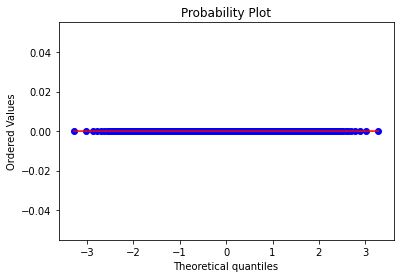

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


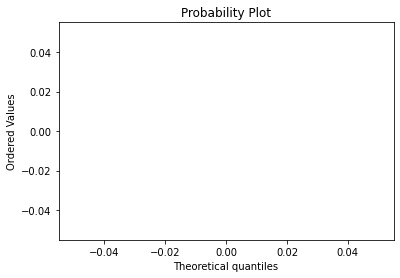

In [37]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

# After standardizing tread

treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()